<a href="https://colab.research.google.com/github/DivyaNarayan0613/DivyaNarayan0613/blob/main/Log_Enc_Horizon_Zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Downloading HorizonZero.png
!wget https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
!mv uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm HorizonZero.png

--2022-11-02 15:07:00--  https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
Resolving drive.google.com (drive.google.com)... 108.177.13.102, 108.177.13.113, 108.177.13.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.13.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5go0ufah5o6h210sog6h5vsnsae278a1/1667401575000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm?uuid=02bbfd7a-d3b9-4bb8-a8f8-bc59ec6b74be [following]
--2022-11-02 15:07:01--  https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5go0ufah5o6h210sog6h5vsnsae278a1/1667401575000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm?uuid=02bbfd7a-d3b9-4bb8-a8f8-bc59ec6b74be
Resolving doc-08-40-docs.googleusercontent.com (doc-08-40-docs.googleusercontent.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to doc-08

In [ ]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [ ]:
def getImageMatrix(imageName):
    im = Image.open(imageName)
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1]

In [ ]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0]

In [ ]:
def LogisticEncryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]
    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    C = round((L*L_y*10**4) % 256)
    C_r = round((L*L_y*10**4) % 256)
    C_g = round((L*L_y*10**4) % 256)
    C_b = round((L*L_y*10**4) % 256)
    x = 4*(S_x)*(1-S_x)
    y = 4*(S_y)*(1-S_y)

    imageMatrix,dimension, color = getImageMatrix(imageName)
    LogisticEncryptionIm = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N)
            if color:
              C_r =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][0]) % N) ^ ((C_r + key_list[7]) % N)
              C_g =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][1]) % N) ^ ((C_g + key_list[7]) % N)
              C_b =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][2]) % N) ^ ((C_b + key_list[7]) % N)
              row.append((C_r,C_g,C_b))
              C = C_r

            else:
              C = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j]) % N) ^ ((C + key_list[7]) % N)
              row.append(C)

            x = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            y = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        LogisticEncryptionIm.append(row)

    im = Image.new("L", (dimension, dimension))
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else:
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = LogisticEncryptionIm[x][y]
    im.save(imageName.split('.')[0] + "_LogisticEnc.png", "PNG")

In [ ]:
def LogisticDecryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]

    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L_x = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L_x *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y

    C = round((L_x*L_y*10**4) % 256)
    I_prev = C
    I_prev_r = C
    I_prev_g = C
    I_prev_b = C
    I = C
    I_r = C
    I_g = C
    I_b = C
    x_prev = 4*(S_x)*(1-S_x)
    y_prev = 4*(L_x)*(1-S_y)
    x = x_prev
    y = y_prev
    imageMatrix, dimension, color = getImageMatrix(imageName)

    henonDecryptedImage = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N)
            if color:
                I_r = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_r + key_list[7]) % N) ^ imageMatrix[i][j][0]) + N-key_list[6])%N
                I_g = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_g + key_list[7]) % N) ^ imageMatrix[i][j][1]) + N-key_list[6])%N
                I_b = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_b + key_list[7]) % N) ^ imageMatrix[i][j][2]) + N-key_list[6])%N
                I_prev_r = imageMatrix[i][j][0]
                I_prev_g = imageMatrix[i][j][1]
                I_prev_b = imageMatrix[i][j][2]
                row.append((I_r,I_g,I_b))
                x = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
            else:
                I = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev+key_list[7]) % N) ^ imageMatrix[i][j]) + N-key_list[6])%N
                I_prev = imageMatrix[i][j]
                row.append(I)
                x = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        henonDecryptedImage.append(row)
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else:
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels
    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(imageName.split('_')[0] + "_LogisticDec.png", "PNG")

In [ ]:
image = "HorizonZero"
ext = ".png"
key = "abcdefghijklm"

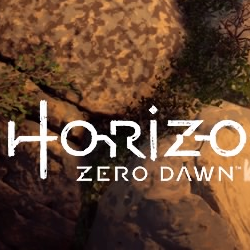

In [ ]:
img = cv2.imread(image + ext)
cv2_imshow(img)

In [ ]:
img.shape

(250, 250, 3)

In [ ]:
import time
start_time=time.time()

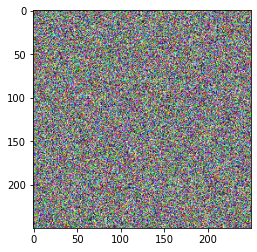

In [ ]:
LogisticEncryption(image + ext, key)
im1 = Image.open(image + "_LogisticEnc.png", 'r')
imshow(np.asarray(im1))

In [ ]:
end_time = time.time()
total_time = end_time - start_time
print("Time: ", total_time)

Time:  0.7843232154846191


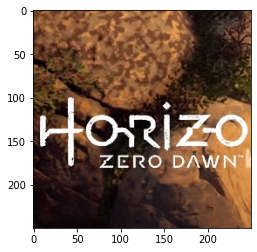

In [ ]:
LogisticDecryption(image + "_LogisticEnc.png", key)
im2 = Image.open(image + "_LogisticDec.png", 'r')
imshow(np.asarray(im2))

In [ ]:
img1=cv2.imread('HorizonZero_LogisticEnc.png')
img2=cv2.imread('HorizonZero_LogisticDec.png')

In [ ]:
import skimage.measure
entropy = skimage.measure.shannon_entropy(img)
print(entropy)

7.4924423342698985


In [ ]:
import skimage.measure
entropy1 = skimage.measure.shannon_entropy(im1)
print(entropy1)

7.998795746416564


In [ ]:
import skimage.measure
entropy2 = skimage.measure.shannon_entropy(im2)
print(entropy2)

7.492449527750649


In [ ]:
psnr = cv2.PSNR(img,img1)
print(psnr)

7.209983736404092


In [ ]:
psnr1 = cv2.PSNR(img1, img2)
print(psnr1)

7.210023728932674
